Set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()
#working directory should be /Code/CodeFigure1

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure1'

Plotting Phenotype Tags by Weeks in w1118(x)

In [3]:
csv_path = "../../Data/DataFigure1/w1118PhenotypeTags.csv"
df = pd.read_csv(csv_path)

In [6]:
df["PhenoTag"] = (
    df["PhenoTag"]
    .replace(r"^\s*$", pd.NA, regex=True)  # catches empty strings or whitespace
    .fillna("None")
)

In [8]:
df["OriginalPhenoTag"] = df["PhenoTag"]

df["HasMultipleTags"] = df["PhenoTag"].str.contains(",", na=False)

df["PhenoTag"] = (
    df["PhenoTag"]
    .fillna("None")
    .str.strip()
)

df["PhenoTag"] = df["PhenoTag"].str.title()

df["PhenoTag_list"] = df["PhenoTag"].str.split(r"\s*,\s*")

df_long = df.explode("PhenoTag_list").rename(
    columns={"PhenoTag_list": "PhenoKeyword"}
)

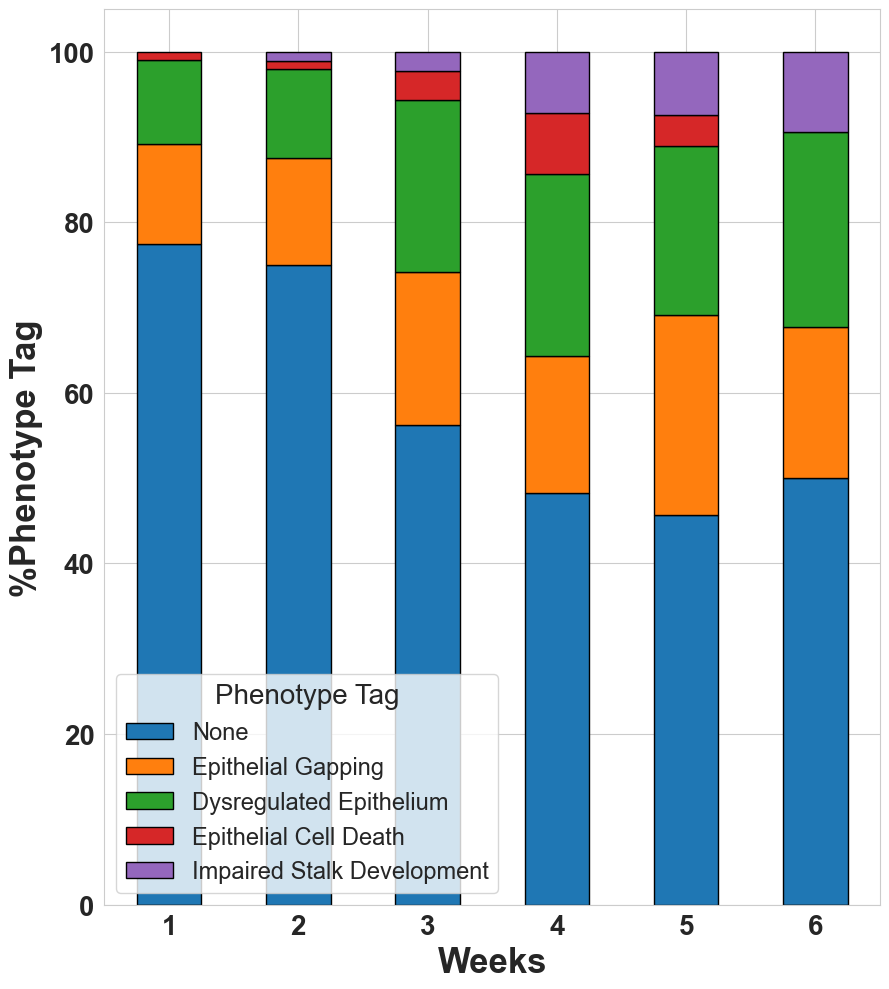

In [ ]:
df_expanded = df.assign(PhenoTag=df['PhenoTag'].str.split(',')).explode('PhenoTag')
df_expanded['PhenoTag'] = df_expanded['PhenoTag'].str.strip()

df_counts = df_expanded.groupby(['Weeks', 'PhenoTag']).size().reset_index(name='count')

df_counts['percent'] = df_counts.groupby('Weeks')['count'].transform(lambda x: x / x.sum() * 100)

df_pivot = df_counts.pivot(index='Weeks', columns='PhenoTag', values='percent').fillna(0)

tag_order = [
    "None",
    "Epithelial Gapping",
    "Dysregulated Epithelium",
    "Epithelial Cell Death",
    "Impaired Stalk Development"
]

existing_tags = [tag for tag in tag_order if tag in df_pivot.columns]
df_pivot = df_pivot[existing_tags]

sns.set_style("whitegrid")
colors = sns.color_palette("tab10", n_colors=len(df_pivot.columns))
ax = df_pivot.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    figsize=(9, 10)
)

plt.xlabel("Weeks", fontweight='bold', fontsize=25)
plt.ylabel("%Phenotype Tag", fontweight='bold', fontsize=25)
plt.xticks(rotation=0, ha='center', fontweight='bold', fontsize=20)
plt.yticks(fontweight='bold', fontsize=20)

plt.legend(
    title="Phenotype Tag",
    title_fontsize=20,
    fontsize=17,
    loc='lower left',
    frameon=True
)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure1', 'PhenotypeTagsWeeks.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()
